# Neural Networks: Linear and Logistic Regression
This notebook demonstrates how the familar optimization problems of linear and logistic regression can be formulated as artificial neural networks. The notebook demonstrates the mathematics of gradient descent.

In [1]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Linear Regression
Let's model the relationship between home square footage and sale price using a Iowa house prices dataset. <br>

In [2]:
# download the data from a github repository
# Iowa house prices, pulled from Kaggle (12/18/18), author: Nick Taylor, https://www.kaggle.com/nickptaylor
url_iowa = "https://raw.githubusercontent.com/prof-groff/deep-learning/master/data/iowa-house-prices/train.csv"
iowa = pd.read_csv(url_iowa)
print('iowa shape: ', iowa.shape)
display(iowa.head(5)) # display looks better than print

('iowa shape: ', (1460, 81))


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Preprocessing the Data

Here house square footage will be the predictor variable (x) and house sale price is the response (y). In machine learning predictor variables are often called features and response variables are called targets. In this example there is just a single feature and a single target. <br>

The data is normalized to a range fo between 0 and 1. This is also called feature scaling and in this situation helps gradient descent converge more quickly. In general, normalizing the features is important because different features usually have different ranges and this can cause the optimization function (usually some measure or error which is also a measure of Euclidian distance) to fail. 

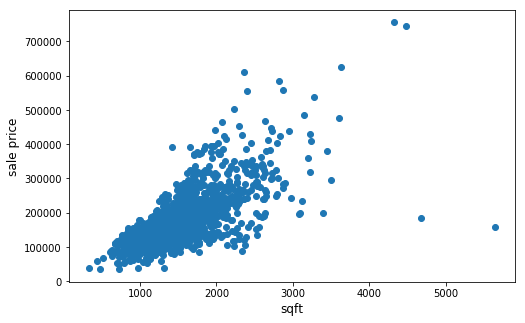

In [3]:
# pull out the home sqft and sale price data and plot it
# sale price appears to have strong linear dependence on square footage
x = iowa['GrLivArea'].values.astype(float)
y = iowa['SalePrice'].values.astype(float)
plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.xlabel('sqft', fontsize=12)
plt.ylabel('sale price', fontsize=12)
plt.show()

In [4]:
# min-max normalization - scales data between zero and one to make the algorithm behave better
xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)

x_norm = (x-xmin)/(xmax-xmin)
y_norm = (y-ymin)/(ymax-ymin)

### Minimizing the Sum of Squared Errors with Gradient Descent
The goal of the following algorithm is to find values for the slope (w) and y-intercept (b) of a line that minimizes the sum of the squared errors between the predicted sale price for each square footage and the actual sale price. This optimaztion problem is set up as a single-node neural network with two inputs (1 weighted by b and x weighted by w) which are summed together to produce a single output (the predicted y).

('epoch:', 0, 'SSE:', 50073.21277450515, 'slope:', 0.005286890975583373, 'y-int', 0.020277905275713215)


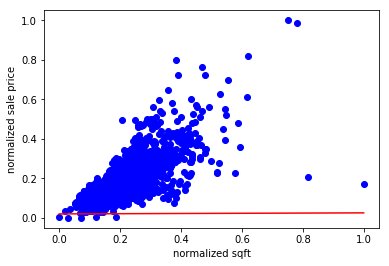

('epoch:', 1000, 'SSE:', 462918042.78544927, 'slope:', 0.4965666518688988, 'y-int', 0.09286666272897222)


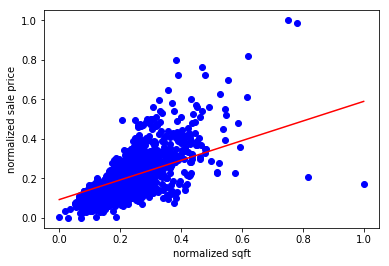

('epoch:', 2000, 'SSE:', 853861362.1901741, 'slope:', 0.6743971439084283, 'y-int', 0.052912176878483125)


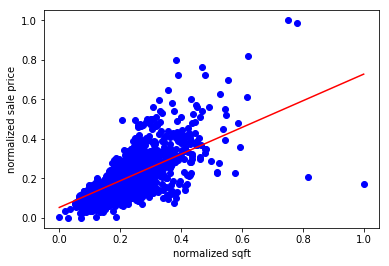

('epoch:', 3000, 'SSE:', 1040156222.0640986, 'slope:', 0.7443383931572994, 'y-int', 0.03719796149601436)


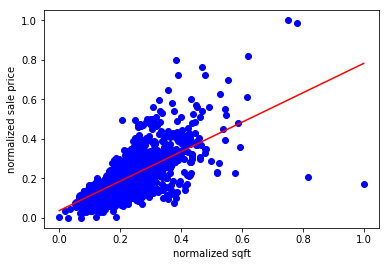

('epoch:', 4000, 'SSE:', 1118459389.8512406, 'slope:', 0.771846489718181, 'y-int', 0.031017514924616928)


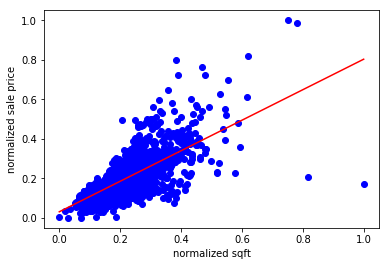

('epoch:', 5000, 'SSE:', 1150034771.8717642, 'slope:', 0.782665504027037, 'y-int', 0.02858672732929643)


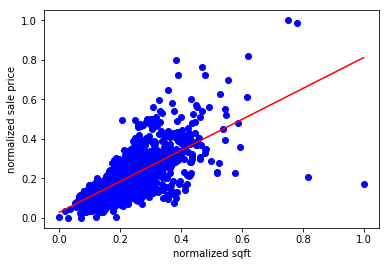

In [5]:
# linear regression using a single-node neural network with no activation

# hyperparameters
learnrate = 0.1

# initial guesses
b = 0
w = 0


numrecords = len(x_norm)
for ii in range(0,5001):
    # set the weight step equal to zero
    dw = 0
    db = 0
    # do for each record in the training data
    for xn, yn in zip(x_norm,y_norm):
        # make a forward pass
        yn_hat = w*xn+b
        # calculate partial derivative of the error (E = (1/2)*(y-y_hat)^2) with respect to w
        dEdw = -(yn-yn_hat)*xn
        dw += dEdw
        # calculate partial derivative of the error with respect to b
        dEdb = -(yn-yn_hat)
        db += dEdb
    
    # update the weight and bias
    w -= learnrate*dw/numrecords
    b -= learnrate*db/numrecords
    
    if ii%1000 == 0: # print out some stuff and make a plot every 1000 epochs
        h = w*x+b
        y_hat = h
        sse = 0.5*np.sum(np.power(y_norm-y_hat,2))
        print('epoch:', ii, 'SSE:', sse, 'slope:', w, 'y-int', b)
        plt.plot(x_norm, y_norm,'bo', [0,1], [0*w+b, 1*w+b], 'r-')
        # plt.plot(0, 6*w+b)
        plt.xlabel('normalized sqft')
        plt.ylabel('normalized sale price')
        plt.show()

## Part 2: Logistic Regression
Let's model the relationship between hours of daily internet usage and the likelihood of clicking an online ad.

In [6]:
# download the data from a github repository
# online advertising data, pulled from Kaggle (12/18/18), author: fayomi, https://www.kaggle.com/fayomi 
url_ads = "https://raw.githubusercontent.com/prof-groff/deep-learning/master/data/advertising.csv"
ads = pd.read_csv(url_ads)
print('ads shape: ', ads.shape)
display(ads.head(5))

('ads shape: ', (1000, 10))


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Preprocessing the Data
Here the predictor (feature) is daily internet usage in minutes and the response (target) is a boolean variable indicating whether the user clicked (1) on an online ad or not (0). The values are converted to floats and normalized like above.

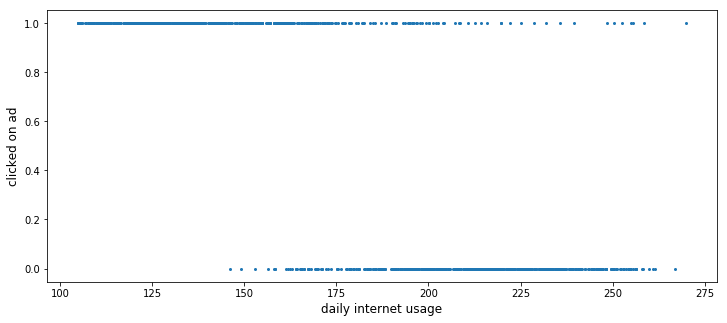

In [7]:
# pull out the daily internet usage and "clicked on ad" data
x = ads['Daily Internet Usage'].values.astype(float)
y = ads['Clicked on Ad'].values.astype(float)
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=4)
plt.xlabel('daily internet usage', fontsize=12)
plt.ylabel('clicked on ad', fontsize=12)
plt.show()

In [8]:
# min-max normalization - scales data between zero and one
xmin = min(x)
xmax = max(x)

x_norm = (x-xmin)/(xmax-xmin)

### Minimizing the Sum of Squared Errors with Gradient Descent
The goal of the following algorithm is to find values for the slope (w) and y-intercept (b) of a line that minimizes the sum of the squared errors between the predicted ad click and daily internet usage. Like above, this optimaztion problem is set up as a single-node neural network with two inputs (1 weighted by b and x weighted by w) which are summed together to produce a single output. The difference is this output is then passed through a logistic function to squash it to between 0 and 1. In the machine learning, this function applied to the output is called an activation function. Including this activation function in the model requires that the derivative of this function be included in the gradient descent calculations. 

('epoch:', 0, 'SSE:', 121.74043980442099, 'slope:', -0.1305910219154861, 'y-int', 0.0)


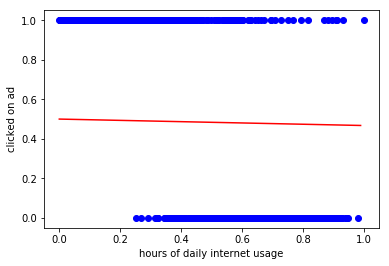

('epoch:', 200, 'SSE:', 46.090733071870176, 'slope:', -6.614851672407415, 'y-int', 2.924124140019261)


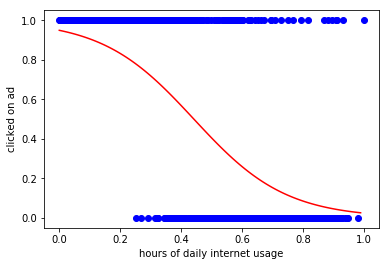

('epoch:', 400, 'SSE:', 42.6508741286725, 'slope:', -8.275370414154466, 'y-int', 3.6692588318446813)


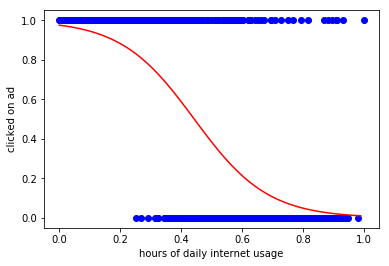

('epoch:', 600, 'SSE:', 41.522715198460574, 'slope:', -9.238602282493154, 'y-int', 4.099218637963885)


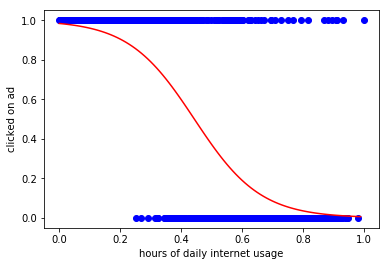

('epoch:', 800, 'SSE:', 40.982976764046484, 'slope:', -9.907385620757628, 'y-int', 4.396708591192825)


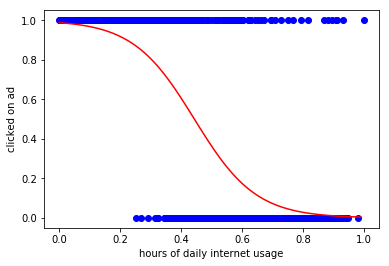

('epoch:', 1000, 'SSE:', 40.67682297243343, 'slope:', -10.411965977342637, 'y-int', 4.620576894282359)


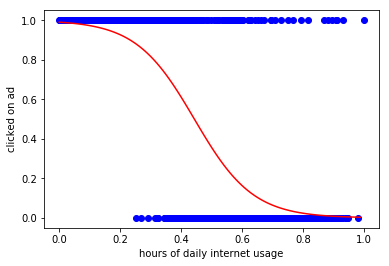

('epoch:', 1200, 'SSE:', 40.48525111122761, 'slope:', -10.811516308157778, 'y-int', 4.79748583309396)


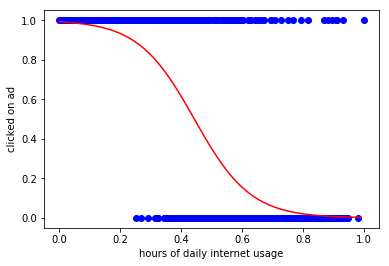

('epoch:', 1400, 'SSE:', 40.35744252655745, 'slope:', -11.138088755763663, 'y-int', 4.941843404527696)


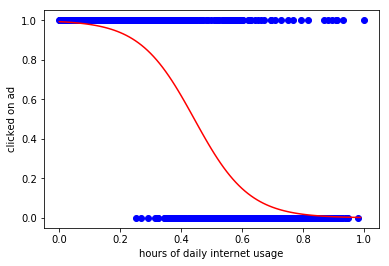

('epoch:', 1600, 'SSE:', 40.26823446222108, 'slope:', -11.41105705286329, 'y-int', 5.062340083431887)


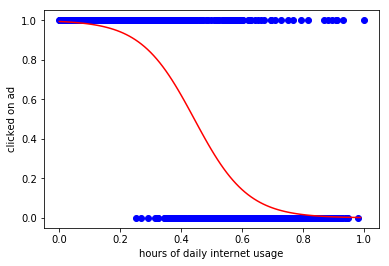

('epoch:', 1800, 'SSE:', 40.20384602239514, 'slope:', -11.643049403569002, 'y-int', 5.164629695665513)


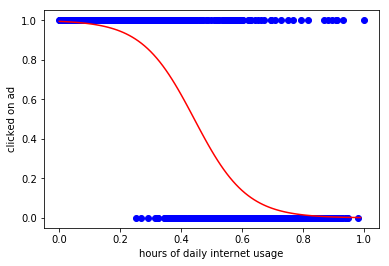

('epoch:', 2000, 'SSE:', 40.15615540355539, 'slope:', -11.842764972488986, 'y-int', 5.252600197480274)


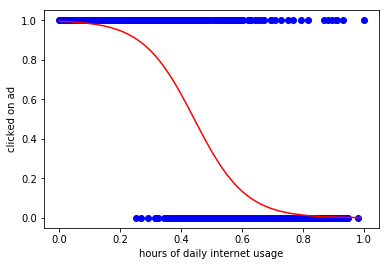

In [9]:
# logistic regression using a single-node neural network with sigmoid activation

# hyperparameter
learnrate = 5

# initial guesses
b = 0
w = 0

numrecords = len(x_norm)
xsig = np.arange(0,1,0.01) # for plotting

# sigmoid activation
def sigmoid(h):
    return 1/(1+np.exp(-h))

# the derivative of the sigmoid, f(h), is f'(h) = f(h)(1-f(h))

for ii in range(0,2001):
    # set the weight step equal to zero
    dw = 0
    db = 0
    # do for each record in the training data
    for xn, yn in zip(x_norm,y):
        # make a forward pass
        h = w*xn+b
        yn_hat = sigmoid(h)
        # calculate partial derivative of the error (E = (1/2)*(y-y_hat)^2) with respect to w
        dEdw = -(yn-yn_hat)*yn_hat*(1-yn_hat)*xn
        dw += dEdw
        # calculate partial derivative of the error with respect to b
        dEdb = -(yn-yn_hat)*yn_hat*(1-yn_hat)
        db += dEdb
    
    # update the weight and bias
    w -= learnrate*dw/numrecords
    b -= learnrate*db/numrecords
    
    if ii%200 == 0: # show some stuff and a plot every 200 epochs
        h = w*x_norm+b
        y_hat = sigmoid(h)
        sse = 0.5*np.sum(np.power(y-y_hat,2))
        print('epoch:', ii, 'SSE:', sse, 'slope:', w, 'y-int', b)
        plt.plot(x_norm, y,'bo', xsig, sigmoid(w*xsig+b), 'r-')
        # plt.plot(0, 6*w+b)
        plt.xlabel('hours of daily internet usage')
        plt.ylabel('clicked on ad')
        plt.show()
